# Destek Vektör Makineleri (SVM) ile Sınıflandırma Çalışması

# Kullanılan veri seti konfeksiyon çalışanlarının verimlilik değerlerinin bulunduğu ve bunların Destek Vektör Sınıflandırıcısı (SVC) ile sınıflandırılması için kullanılan bir veri setidir. 
Veri seti üzerinde yapılan işlemler kısaca maddeler halinde listelenmiştir:

- Boş değerlerin analizi ve doldurulması
- Tarih içeren sütunların silinmesi
- Bazı sütunlarda girilen yanlış ve eksik verilerin düzenlenmesi
- Aykırı değerlerin normalizasyonu
- MinMax Scaler ile verilerin belirli bir aralığa sıkıştırılması
- Korelasyon analizi ile bazı sütunların düşürülmesi
- Ordinal verilerin encode edilmesi
- Kukla değişkenler kullanılarak bazı sütunların binary kodlanması
- Y değerlerinin kesikli hale getirildikten sonra 0 ve 1 şeklinde kodlanarak sınıflandırmaya hazır hale getirilmesi
- Modelin oluşturulması, eğitilmesi, test edilmesi ve metriklerine bakılması


Veriseti linki: ' http://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees ' 


In [1]:
#Kullanılacak kütüphaneler dahil edilir

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer, OrdinalEncoder, OneHotEncoder
from warnings import filterwarnings

In [2]:
#Uyarılar görmezden gelinir ve grafikleri sütun aralarında görmek için % inline komutu kullanılır

%matplotlib inline
filterwarnings('ignore')

In [6]:
#Data isimli değişkene csv dosyasından okunan değerler aktarılır

data = pd.read_csv("garments_worker_productivity.csv")

In [8]:
data.to_excel("Data.xlsx")

In [115]:
#Verinin ilk 10 satırı

data.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


In [116]:
#Tarih değişkeni kaldırılır

data.drop('date', axis =1, inplace=True)

In [117]:
#Verinin satır sütun bilgisine bakılır

data.shape

(1197, 14)

In [118]:
#Bütün attribute'lerin veri tipi kontrol edilir

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    691 non-null    float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 131.0+ 

In [119]:
#Aykırı değerlerin olup olmadığıyla ilgili gözlem yapılır

data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [120]:
#Null değer olup olmadığı kontrol edilir

data.isnull().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [121]:
#wip sütunundaki boş değerler yine wip sütunundaki ortalama ile doldurulur

data['wip'] = data['wip'].fillna(value= data.wip.mean())

In [122]:
#MinMaxScaler ile ölçekleme yapılır

mm_scaler = MinMaxScaler(feature_range=(0,10))

In [123]:
data.actual_productivity = mm_scaler.fit_transform(data['actual_productivity'].values.reshape(-1,1))

In [124]:
#Ay verilerinde 4 yerine 5 quarter olup olmadığı tespit edilir.

data.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [125]:
#Aylar 4 quarter'a bölünmiştür fakat verideki hata yüzünden 5 quarter vardır ve 5. quarter değeri silinir

data = data[data['quarter'] !='Quarter5']

In [126]:
#Ordinal encoder sınıfından bir değişken üretilir

encoder = OrdinalEncoder()

In [127]:
#Yeni bir label'a encode edilen veriler yerleştilir

new_labels =encoder.fit_transform(data.quarter.values.reshape(-1,1))

In [128]:
#Encoder kategorilerinin doğru ayrılıp ayrılmadığı kontrol edilir

encoder.categories_

[array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'], dtype=object)]

In [129]:
#Yeni label kontrol edilir

new_labels

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [130]:
#Ay verilerine yeni encode edilmiş değerler verilir

data.quarter = new_labels

In [131]:
#Ay verilerindeki değişiklik kontrol edilir

data.quarter

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1192    1.0
1193    1.0
1194    1.0
1195    1.0
1196    1.0
Name: quarter, Length: 1153, dtype: float64

In [132]:
#Aynı işlemler gün verileir için de yapılır

new_days = encoder.fit_transform(data.day.values.reshape(-1,1))

In [133]:
encoder.categories_

[array(['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
       dtype=object)]

In [134]:
data.day = new_days

In [135]:
#Finishing ile ilgili isimlendirmede ekstra boşluk bırakarak yaratılan yanıltıcı 'finishing ' değeri kaldırılır

data.department.unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [85]:
#İşlem verisetine işlenir

data = data[data['department'] !='finishing ']

In [86]:
#Doğrulama için kontrol edilir

data.department.unique()

array(['sweing', 'finishing'], dtype=object)

In [137]:
#Kukla değişkenler ile departman sütunu binary hale çevrilir ve bu değişiklikler verisetine işlenir

data = pd.get_dummies(data, sparse=False)

In [88]:
#Verisetindeki department değişkeni önceden olduğu gibi ilk sıra sütunlara getirilir

data = data[['quarter','department_finishing','department_sweing','day','team','targeted_productivity','smv',
             'wip','over_time','incentive','idle_time','idle_men','no_of_style_change','no_of_workers',
             'actual_productivity']]

In [89]:
#Tahmin edilecek sınıflarımız olan actual_productiviy sütunu 0-6 ve 6-10 değerleri arasında kesikli hale getirilir

success_status = [0,6,10]
data.actual_productivity = pd.cut(data.actual_productivity, bins=success_status, labels=['Failure','Success'])

In [90]:
#0-6 arasındaki gruba başarısız, 6-10 arasındaki gruba başarılı olduğunu belirtmek için 0 ve 1 değerleri verilir
data.replace(to_replace='Failure', value=0, inplace=True)
data.replace(to_replace='Success', value=1, inplace=True)

In [92]:
#Veri tekrar kontrol edilir

data

,quarter,department_finishing,department_sweing,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.0,0,1,3.0,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,1
2,0.0,0,1,3.0,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,1
3,0.0,0,1,3.0,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,1
4,0.0,0,1,3.0,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,1
5,0.0,0,1,3.0,7,0.80,25.90,984.000000,6720,38,0.0,0,0,56.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,1.0,1,0,5.0,10,0.75,2.90,1190.465991,960,0,0.0,0,0,8.0,0
1193,1.0,1,0,5.0,8,0.70,3.90,1190.465991,960,0,0.0,0,0,8.0,0
1194,1.0,1,0,5.0,7,0.65,3.90,1190.465991,960,0,0.0,0,0,8.0,0
1195,1.0,1,0,5.0,9,0.75,2.90,1190.465991,1800,0,0.0,0,0,15.0,0


In [93]:
#Medium'da yazılan bir makaleye göre pca analizini sınıflandırma ve kümeleme görevlerinde 
#uygulamamamız gerektigini öğrendim bu sebeple pca analizi yapılmamıştır.

In [94]:
#Heatmap kullanabilmek için seaborn kütüphanesi içe aktarılır

import seaborn as sns

In [95]:
#Veri seti X ve y olmak üzere 2'ye ayrılır

X = data.drop(labels='actual_productivity', axis=1)
y = data['actual_productivity']

In [96]:
#Train_test_split fonksiyonu ile eğitim ve test veri setleri ayrılır

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((687, 14), (230, 14), (687,), (230,))

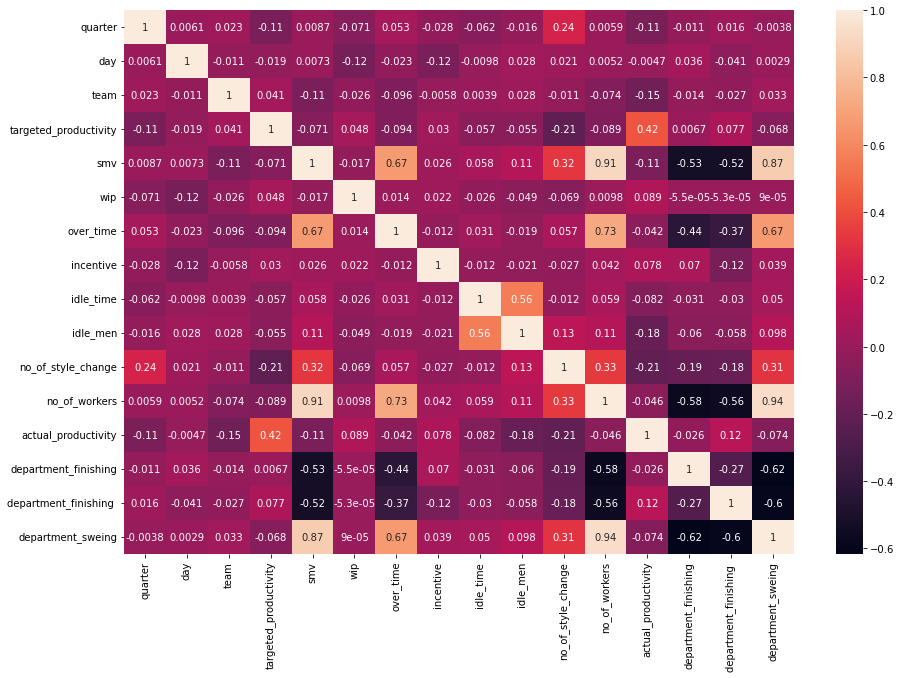

<Figure size 432x288 with 0 Axes>

In [138]:
#Verisetindeki korelasyon analizine bakılarak 
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.show()
plt.savefig('C_Heatmap')

In [98]:
#Korelasyon analizinde svm sütununun diğer sütunlarla arasındaki korelasyonun yüksek olmasından kaynaklı silinmiştir

data.drop(labels='smv', axis=1, inplace=True)

In [100]:
#Model kurulmuştur

svm_model = svm.SVC(kernel='linear', gamma=0.001)

In [101]:
#actual_productivity kesikli hale getirilirken 'Failure' değerini alan bir sample 0 değerini kabul etmemiş (0,6](6,10]
y_train[y_train.isnull()] = 0

In [102]:
#Model x ve y eğitim setleriyle eğitilmiştir

svm_model.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear')

In [103]:
#X test setini tahmin yapmak için kullanıp yapılan tahminler de y_pred değişkenine atanmıştır

y_pred = svm_model.predict(X_test)

In [104]:
#Tahmin değerlerini gösterilmesi

y_pred

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int64)

In [105]:
#Tahminler isimli yeni bir dataframe oluşturarak tahminler ve gerçek değerler pandas dataframe'inde gösterilmiştir

predictions = pd.DataFrame({'Gerçek değer':y_test, 'Tahmin edilen':y_pred, 'Başarı': y_test == y_pred})
predictions.head()

,Gerçek değer,Tahmin edilen,Başarı
206,1,1,True
653,0,1,False
1188,0,0,True
221,1,1,True
791,1,0,False


In [106]:
data.head()

,quarter,department_finishing,department_sweing,day,team,targeted_productivity,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.0,0,1,3.0,8,0.8,1108.0,7080,98,0.0,0,0,59.0,1
2,0.0,0,1,3.0,11,0.8,968.0,3660,50,0.0,0,0,30.5,1
3,0.0,0,1,3.0,12,0.8,968.0,3660,50,0.0,0,0,30.5,1
4,0.0,0,1,3.0,6,0.8,1170.0,1920,50,0.0,0,0,56.0,1
5,0.0,0,1,3.0,7,0.8,984.0,6720,38,0.0,0,0,56.0,1


In [107]:
#Tahmin yapabilmek için sütunlardaki değerlere bakılarak yeni bir veri oluşturulmuştur

new_data = [[0,0,1,3,8,0.8,26,1100,5000,98,0,0,0,59]]

In [108]:
#predict fonksiyonu ile yeni veri makineye tahmin ettirilmiştir

svm_model.predict(new_data)

array([1], dtype=int64)

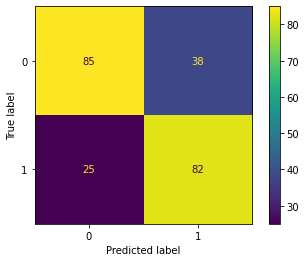

In [109]:
#Karmaşıklık matrisi ile yapılan tahminlerin analizi yapılır

cm = confusion_matrix(y_test.to_numpy(), y_pred, labels=svm_model.classes_, )
disp = ConfusionMatrixDisplay(confusion_matrix =cm, display_labels=svm_model.classes_)
disp.plot();
plt.savefig("Conf")

In [110]:
#Modelin doğruluk skoru metriği görüntülenir

accuracy_score(y_test, y_pred)

0.7260869565217392

In [111]:
#Sınıflandırma raporu ile gerekli değerler gözlenmiştir

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73       123
           1       0.68      0.77      0.72       107

    accuracy                           0.73       230
   macro avg       0.73      0.73      0.73       230
weighted avg       0.73      0.73      0.73       230

